# 추론통계 - 신뢰구간
## 준비작업

In [2]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm # 글꼴을 시스템에 등록
import seaborn as sb
from hossam import load_data
from scipy.stats import t
from math import sqrt

## 그래프 초기화

In [4]:
my_dpi = 200
font_path = 'C:\\Users\\wodyd\\Documents\\카카오톡 받은 파일./MaruBuri-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = 'MaruBuri'
my_theme = 'dark'
sb.set_theme(style = my_theme)

plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

## 데이터 가져오기

In [5]:
origin = load_data('height')
origin.head()

[data] https://data.hossam.kr/data/lab10/height.xlsx
[desc] 어느 학교의 학년, 성별, 키에 대한 가상의 조사 자료 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,학년,성별,키
0,1,남자,163
1,2,여자,154
2,1,남자,171
3,3,여자,160
4,4,남자,169


## 신뢰구간 구하기
### 신뢰구간을 구하는데 필요한 값 산출


In [6]:
# 신뢰수준과 대상 데이터
clevel = 0.95
data = origin['키']

In [7]:
# 샘플 사이즈
n = len(data)
n

36

In [8]:
# 자유도
dof = n - 1
dof

35

In [9]:
# 표본평균
sample_mean = data.mean()
sample_mean

np.float64(167.83333333333334)

In [10]:
# 표본 표준 편차
sample_std = data.std()
sample_std

np.float64(7.315345905306578)

In [11]:
# 표본 표준오차
sample_std_error = sample_std / sqrt(n)
sample_std_error

np.float64(1.2192243175510964)

In [12]:
# 신뢰구간

cmin, cmax = t.interval(clevel, dof, loc = sample_mean, scale = sample_std_error)
cmin, cmax

(np.float64(165.35817637995726), np.float64(170.30849028670943))

## 신뢰구간 범위 시각화

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_8864\413654533.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.kdeplot(data = origin['키'], fill = False,


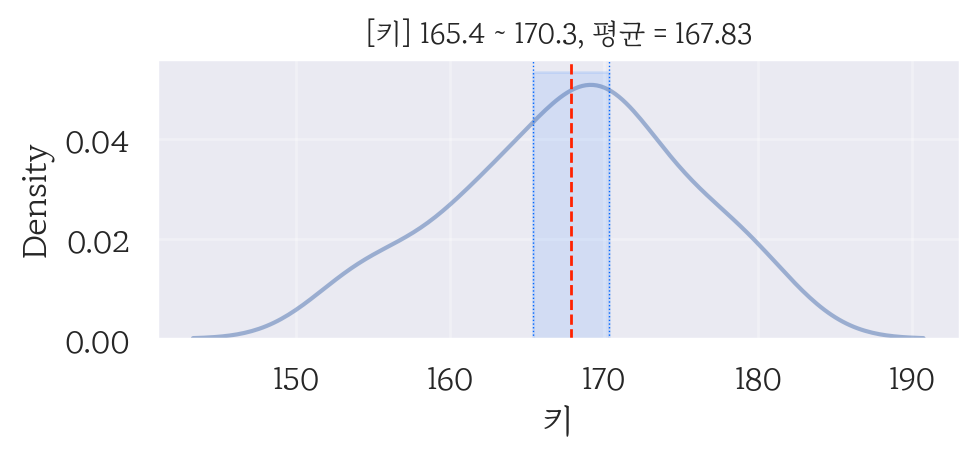

In [ ]:
width_px = 1000
height_px = 480
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# kdeplot 그리기 
sb.kdeplot(data = origin['키'], fill = False,
           alpha = 0.5, palette='pastel')

# 신뢰구간 범위 그리기
ax.axvline(cmin, linestyle = ':', color = '#0066ff', linewidth = 0.5)
ax.axvline(cmax, linestyle = ':', color = '#0066ff', linewidth = 0.5)

# 현재 축 범위 가져오기
ymin, ymax = ax.get_ylim()
ax.fill_between([cmin, cmax], 0, ymax, alpha = 0.1, color = '#0066ff88')

# 평균 표시
ax.axvline(sample_mean, linestyle = '--', linewidth = 1, color = '#ff2200')

# 그래프 꾸미기
ax.grid(True, alpha = 0.3)
ax.set_title(f'[{data.name}] {cmin:.1f} ~ {cmax:.1f}, 평균 = {sample_mean:0.2f}', fontsize = 10)

# 출력
plt.tight_layout()
plt.show()
plt.close()